In [3]:
# from __future__ import print_function, division

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [6]:
# TODO define gaussian function here
def gaussian(x, mean, sig):
    return np.exp(-np.power(x - mean, 2.) / (2 * np.power(sig, 2.)))

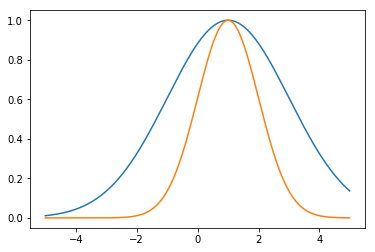

In [7]:
# TODO plot gaussians here
x=np.arange(-5,5,0.01)

y1=gaussian(x,1,1)
y2=gaussian(x,1,2)

plt.plot(x, y2)
plt.plot(x, y1)


plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

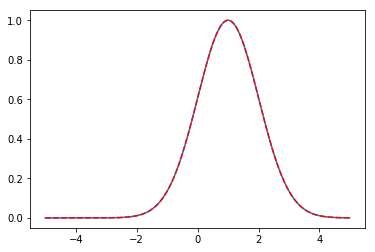

In [8]:
from scipy.optimize import curve_fit
guess=[1,1]
params, covar= curve_fit(gaussian, x, y1, guess)
y_fit=gaussian(x,*params)


# TODO plot result
plt.plot(x,y1)
plt.plot(x,y_fit, 'r--')
plt.show

In [47]:
# TODO: load data here
x_data, y_data = np.loadtxt('HDalpha_data', unpack=True)

<function matplotlib.pyplot.show(*args, **kw)>

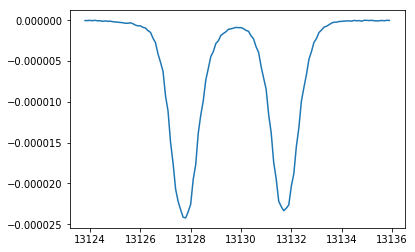

In [48]:
# TODO: plot it
plt.plot(x_data,y_data)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

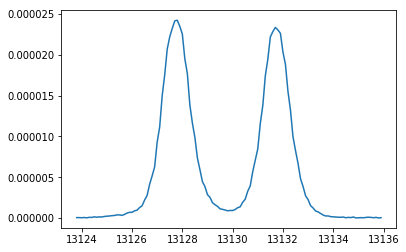

In [49]:
# TODO: plot data as emission signal
plt.plot(x_data,-y_data)
plt.show

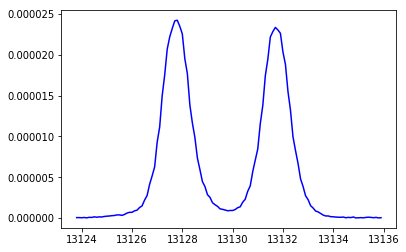

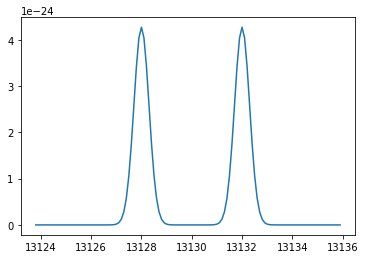

In [63]:
from scipy.optimize import leastsq

plt.plot(x_data, -y_data, 'b')
plt.show()

def double_gaussian( x, params):
    (c1, mu1, sigma1, c2, mu2, sigma2) = params
    res =   c1 * np.exp( - (x - mu1)**2.0 / (2.0 * sigma1**2.0) ) \
          + c2 * np.exp( - (x - mu2)**2.0 / (2.0 * sigma2**2.0) )
    return res

def double_gaussian_fit(params):
    fit = double_gaussian(x, params)
    return (fit)

# TODO plot result
fit = leastsq( double_gaussian_fit, [-2.5e-5, 13128, 0.3, -2.5e-5, 13132, 0.3] )
plt.plot( x, double_gaussian(x, fit[0] ))

plt.show()

# Part 2

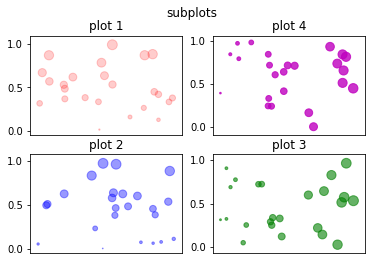

In [13]:
# TODO: part 2
array1=np.random.rand(100)
array2=np.random.rand(100)
f, axs= plt.subplots(2, 2)
axs[0, 0].scatter(array1[0:24],array2[0:24], color='r', alpha=0.2,s=100*array2[0:24])
axs[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0,0].set_title('plot 1')
axs[1, 0].scatter(array1[25:49],array2[25:49], color='b', alpha=0.4,s=100*array2[25:49])
axs[1, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1,0].set_title('plot 2')
axs[1, 1].scatter(array1[50:74],array2[50:74], color='g',alpha=0.6, s=100*array1[50:74])
axs[1, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[1,1].set_title('plot 3')
axs[0, 1].scatter(array1[75:99],array2[75:99], color='m',alpha=0.8, s=100*array1[75:99])
axs[0, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
axs[0,1].set_title('plot 4')
f.suptitle('subplots')
plt.show()

# Part 3

In [14]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

/Users/celiatandon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


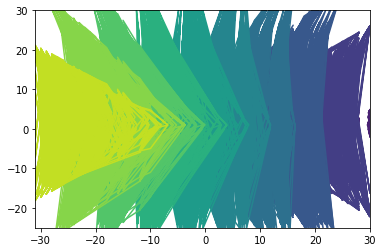

In [15]:
# TODO create arrays of information
x_position=np.random.randint(-10,10,2)
y_position=np.random.randint(-10,10,2)
Y=np.random.randint(-31.5, 31.5, 64)
X=np.random.randint(-31.5, 31.5, 64)
q=np.random.randint(-5,5,2)
# TODO get flux
flux=flux_for_dipole(x_position, y_position, q, X,Y)

# TODO plot contours of the flux
plt.contour(X,Y,flux,10)
plt.show()